# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships

      Correlations
      Scatterplots
      Pair Plots
      Categorical Plots

### Importing Visualization Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#assigning path
path = r'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Achievement 6'

In [3]:
# importing dataset
df_choc_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_choc_clean.csv'),index_col = False)

In [4]:
df_choc_clean.shape

(1795, 9)

In [5]:
df_choc_clean.head()

,Unnamed: 0,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [6]:
#Dropping Unnamed column
df_choc_clean = df_choc_clean.drop('Unnamed: 0', axis=1)

In [7]:
#Checking output
df_choc_clean.shape

(1795, 8)

In [8]:
df_choc_clean.head()

,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [9]:
#summary statistics
df_choc_clean.describe()

,Ref,Review_date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [10]:
#changing data type for Cocoa_percentage to numeric for ease of analysis
df_choc_clean['Cocoa_percentage'] = df_choc_clean['Cocoa_percentage'].str.replace('%','').astype(float)/100
df_choc_clean.head()

,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


### Exploring Relationships

### 1.Correlations

In [11]:
# Create a correlation matrix using pandas

df_choc_clean.corr()

/var/folders/m2/zxgfyynd7mlcccmlnk3x0n800000gn/T/ipykernel_6471/3299281415.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_choc_clean.corr()


,Ref,Review_date,Cocoa_percentage,Rating
Ref,1.000000,0.985076,0.037791,0.101030
Review_date,0.985076,1.000000,0.038177,0.099846
Cocoa_percentage,0.037791,0.038177,1.000000,-0.164820
Rating,0.101030,0.099846,-0.164820,1.000000


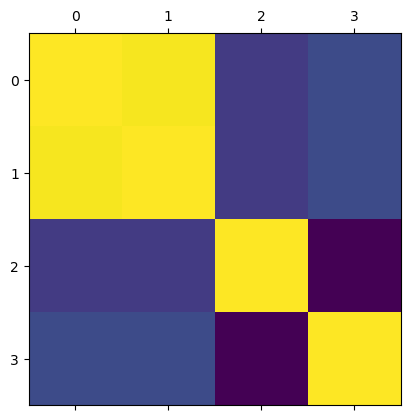

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_choc_clean.corr(numeric_only = True))
plt.show()

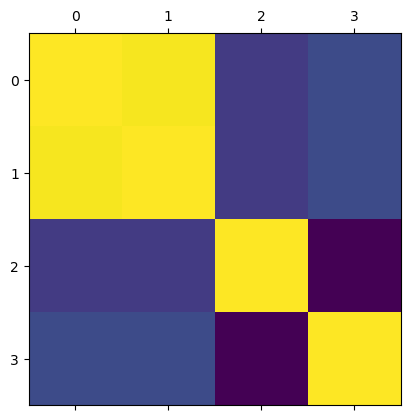

In [13]:
# Save figure
plt.matshow(df_choc_clean.corr(numeric_only = True))
plt.savefig("heatmap.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [14]:
#current dir
cwd = os.getcwd()
cwd

'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Achievement 6/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

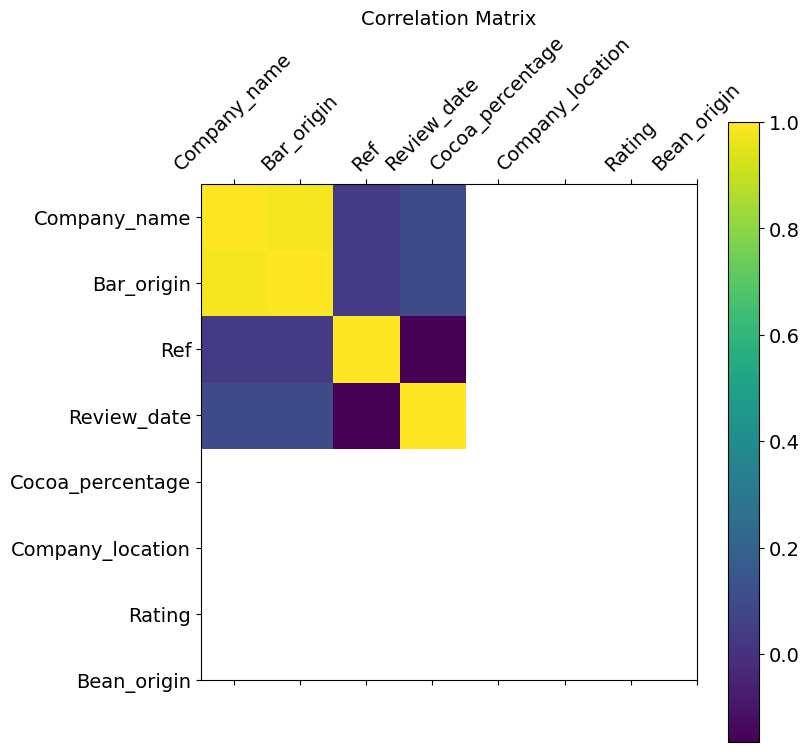

In [15]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_choc_clean.corr(numeric_only = True), fignum=f.number) # type of plot
plt.xticks(range(df_choc_clean.shape[1]), df_choc_clean.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_choc_clean.shape[1]), df_choc_clean.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### <font color = 'crimson'>The only two numerical variables that are significant for our questions are cocoa percentages and ratings. From the chart, we can tell that there is a weak negative correlation between cocoa percentage and rating.</font>

#### Create a correlation heatmap using seaborn:

In [16]:
df_choc_clean.columns

Index(['Company_name', 'Bar_origin', 'Ref', 'Review_date', 'Cocoa_percentage',
       'Company_location', 'Rating', 'Bean_origin'],
      dtype='object')

In [17]:
# Create a subset of numerical columns

sub = df_choc_clean[['Cocoa_percentage','Rating']]

In [18]:
sub

,Cocoa_percentage,Rating
0,0.63,3.75
1,0.70,2.75
2,0.70,3.00
3,0.70,3.50
4,0.70,3.50
...,...,...
1790,0.70,3.75
1791,0.65,3.00
1792,0.65,3.50
1793,0.62,3.25


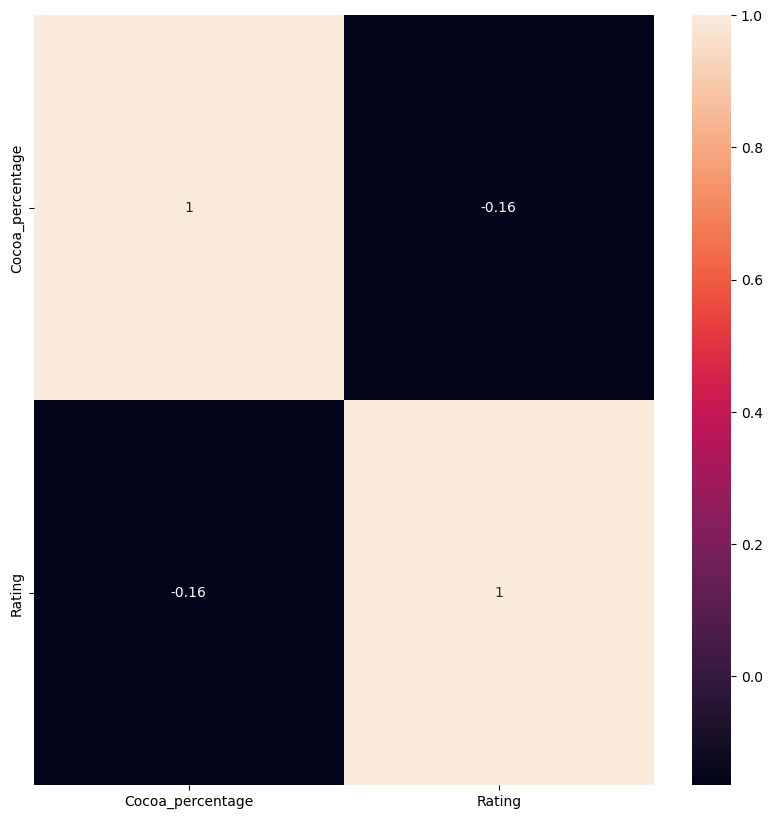

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(numeric_only = True), annot = True, ax = ax) 

plt.savefig("heatmap_seaborn.png") 

## <font color='green'>Q1. What is the relationship between cocoa percentage and ratings?</font>

### Scatterplots:


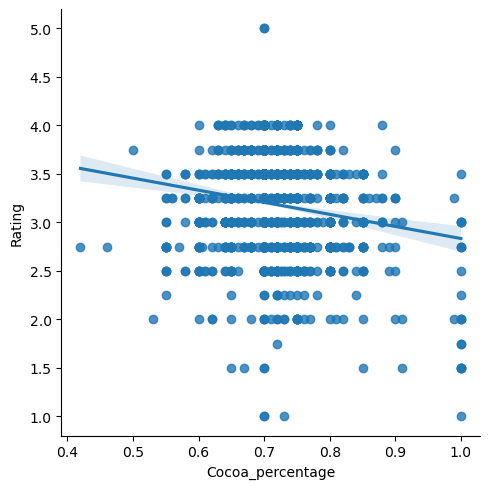

In [20]:
# Create a scatterplot for the "Rating" and "Review_date" columns in seaborn

sns.lmplot(x = 'Cocoa_percentage', y = 'Rating', data = df_choc_clean)

plt.savefig("scatterplot.png") 

From the above we can see that there is a negative corelation between the cocoah percentage and the ratings, but the slope is not a steep one, it is not a very strong relationship. This implies that ratings are affected by more than one factor.

### Pair Plots:

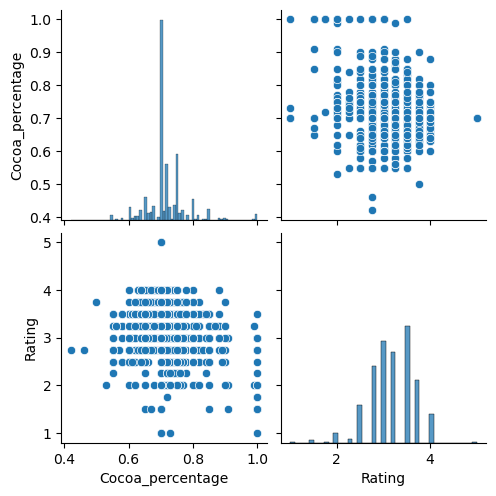

In [21]:
# Create a pair plot 

g = sns.pairplot(sub)
plt.savefig("pairplot.png") 

#### <font color = 'crimson'> The pairplot also provides the same insight as the scatterplot.</font>



### Categorical Plots:


##### Creating a categorical variable that splits the "Cocoa_percentage" column into categories

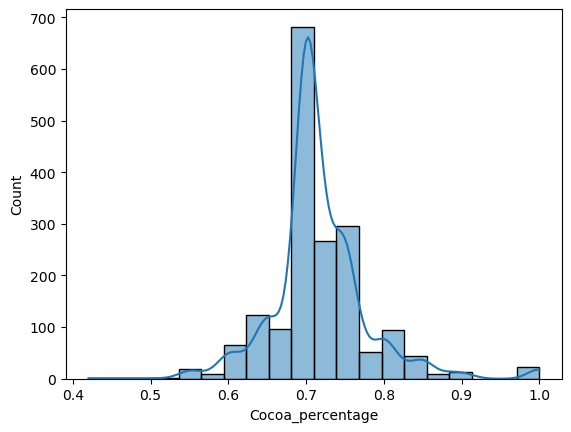

In [22]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_choc_clean['Cocoa_percentage'], bins = 20, kde = True)

plt.savefig("hist_cocoa%.png") 

#### <font color = 'crimson'> An overwhelming number of rated chocolates are 70% cocoa, and majority fall between the range of 70% - 75% </font>

In [23]:
df_choc_clean.loc[df_choc_clean['Cocoa_percentage'] < 0.5, 'Cocoa Percent Category'] = 'Low percent'

In [24]:
df_choc_clean.loc[(df_choc_clean['Cocoa_percentage'] >= 0.5) & (df_choc_clean['Cocoa_percentage'] < 0.8), 'Cocoa Percent Category'] = 'Middle percent'

In [25]:
df_choc_clean.loc[df_choc_clean['Cocoa_percentage'] >= 0.8, 'Cocoa Percent Category'] = 'High percent'

In [26]:
df_choc_clean['Cocoa Percent Category'].value_counts(dropna = False)

Middle percent    1610
High percent       183
Low percent          2
Name: Cocoa Percent Category, dtype: int64

In [27]:
df_choc_clean.columns

Index(['Company_name', 'Bar_origin', 'Ref', 'Review_date', 'Cocoa_percentage',
       'Company_location', 'Rating', 'Bean_origin', 'Cocoa Percent Category'],
      dtype='object')

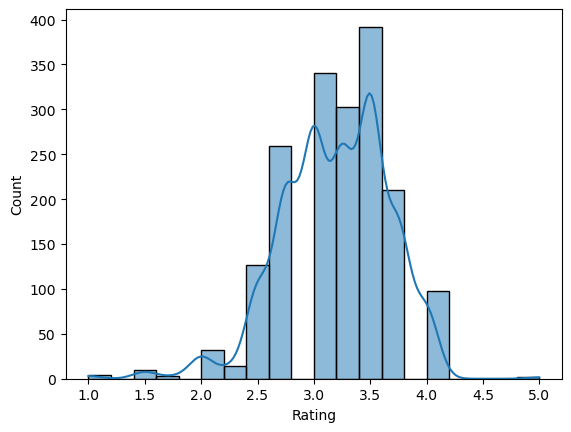

In [28]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_choc_clean['Rating'], bins = 20, kde = True)

plt.savefig("hist_rating.png") 

#### <font color= 'crimson'> * Most chocolates have a rating that fall between the range of 3 and 3.5</font>

#### <font color= 'crimson'> * Very few chocolates are rated 1 or 5</font>

#### <font color= 'crimson'> * No chocolates were rated 4.5</font>

#### <font color= 'crimson'> * More chocolates were rated 3 or lower than were rated 4 and higher</font>

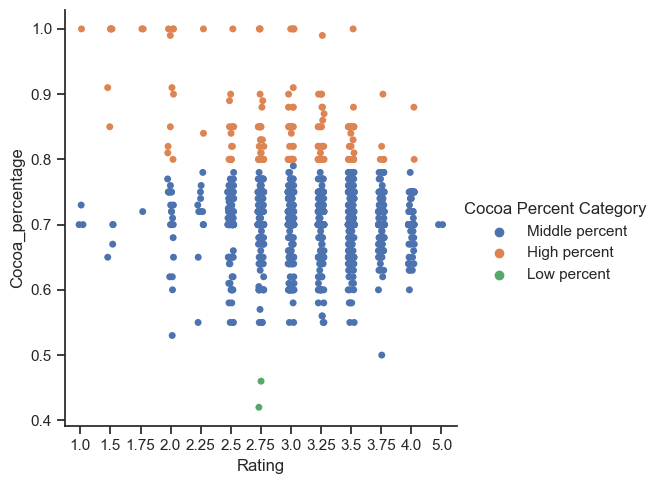

In [29]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Rating",y="Cocoa_percentage", hue="Cocoa Percent Category", data=df_choc_clean)

plt.savefig("catrgorical_plot.png") 

#### <font color='crimson'>The categorical plot provided similar insights to the scatterplot and pairplot. However, by dividing the cocoa percentages into categories, we can see that a majority of the candy bar have 50- 80% cocoa percentage.</font>



In [30]:
# fig = g.get_figure()
g.savefig("out.png") 



#### <font color='crimson'>* Using these visualizations, I can answer the question "What's the relationship between cocoa solids percentage and rating?. </font>
#### <font color='crimson'>* The plots clearly shows that there is a very weak relationship between cocoa percentage and ratings. </font>

## <font color='green'>Q2. Top 10 countries that manufacture most bars.</font>


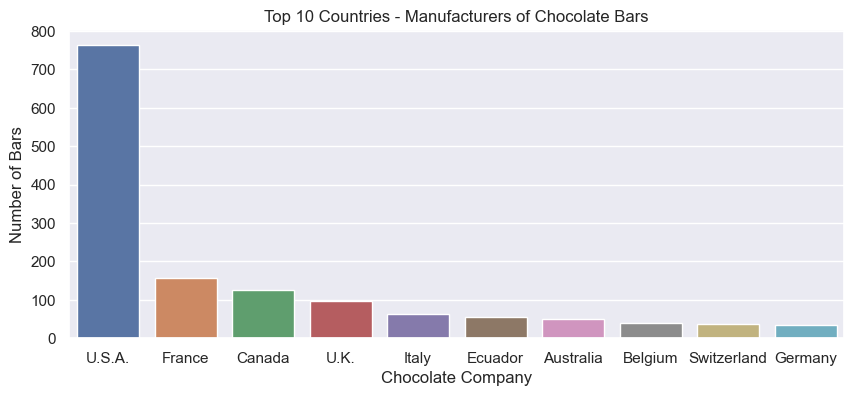

In [43]:
# Top 5 companies in terms of chocolate bars 
d = df_choc_clean['Company_location'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company_location', data=d)
plt.xlabel("Chocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 10 Countries - Manufacturers of Chocolate Bars")
plt.show() 

#### <font color='crimson'>The U.S.A is the largest producer of chocolate globally, followed by France and Canada, respectively.</font>

## <font color='green'>Q3. Which are the Top 10 companies in terms of Chocolate bar production?</font>


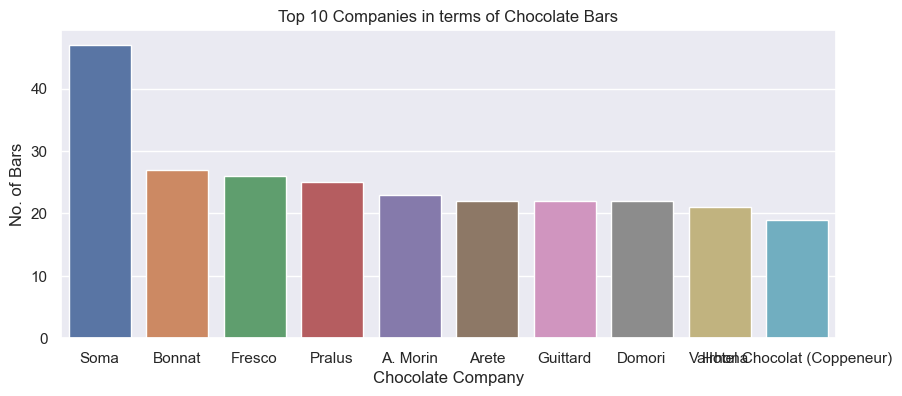

In [32]:
# Top 10 companies in terms of chocolate bars 
df = df_choc_clean['Company_name'].value_counts().sort_values(ascending=False).head(10)
df = pd.DataFrame(df)
df = df.reset_index() # dataframe with top 10 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company_name', data=df)
plt.xlabel('Chocolate Company')
plt.ylabel('No. of Bars')
plt.title('Top 10 Companies in terms of Chocolate Bars')
plt.savefig('bar_top_10_companies.png')
plt.show()

#### <font color = 'crimson'>Soma produces max number of chocolate bars.</font>

## <font color='green'>Q4. What are the top & bottom 5 bean growers?</font>


In [33]:
mean_by_country = df_choc_clean.groupby(['Bean_origin'])['Rating'].mean()

In [34]:
mean_sorted = mean_by_country.sort_values(ascending=False)
top_5 = mean_sorted[:5]
bottom_5 = mean_sorted[-5:]

In [35]:
top_bottom_5 = pd.concat([top_5,bottom_5])

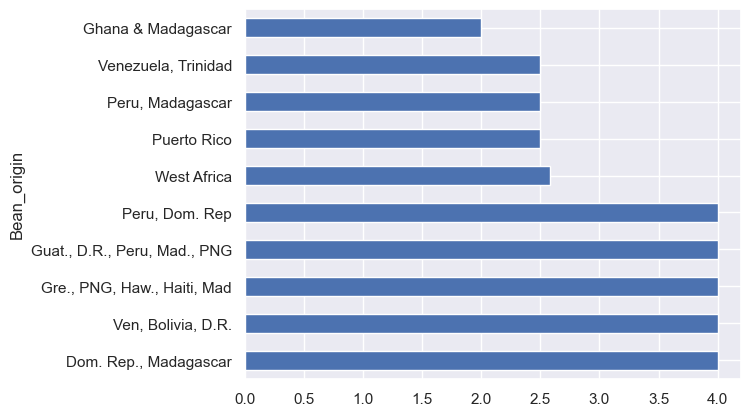

In [36]:
#Plotting

top_bottom_5.plot(kind = 'barh')

plt.savefig('barh_beanorigin_rating.png') 

#### <font color='crimson'>* On average, the best beans come from Peru; the worst come from Ghana & Madagascar</font>



## <font color='green'>Q5. Which country produces the best chocolate?</font>


In [37]:
mean_by_country = df_choc_clean.groupby(["Company_location"])['Rating'].mean()

In [38]:
mean_sorted = mean_by_country.sort_values(ascending=False)
top_10 = mean_sorted[:10]

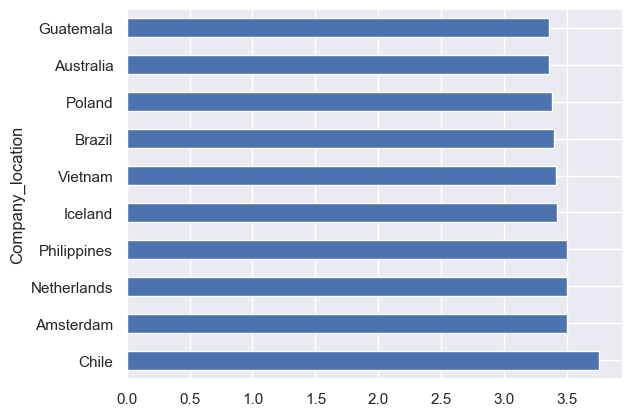

In [39]:
#Plotting

top_10.plot(kind = 'barh')

plt.savefig("barh_location_rating.png")

## <font color='green'>Q6. What have been the Avergae Chocolate ratings over the years?</font>


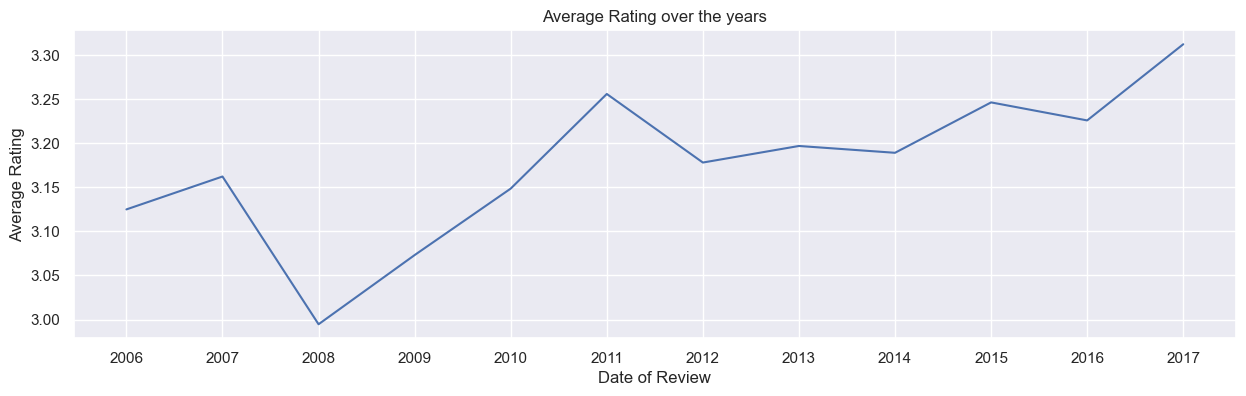

In [40]:
drate = df_choc_clean.groupby('Review_date').aggregate({'Rating':'mean'})
drate = drate.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_date', y='Rating', data=drate)
ax.set(xticks=drate.Review_date.values)
plt.xlabel("Date of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years")
plt.savefig("line_graph_choc_ratings.png")
plt.show()

#### <font color = 'crimson'>Some observations

* The lowest rating was 3 in 2008.
* Since then to 2011, there was an increase in average ratings and in 2011 it was at 3.25.
* The ratings peaked in 2017 to 3.25.


## <font color='green'>Q7. Top 10 companies with highest ratings?</font>

In [41]:
data_sorted_by_rating = df_choc_clean[['Rating', 'Company_name']].sort_values(['Rating'], ascending=False)
data_sorted_by_rating = data_sorted_by_rating.head(10)
data_sorted_by_rating

,Rating,Company_name
78,5.0,Amedei
86,5.0,Amedei
222,4.0,Bonnat
76,4.0,Amedei
1663,4.0,Tobago Estate (Pralus)
179,4.0,Benoit Nihant
180,4.0,Benoit Nihant
1544,4.0,Soma
1543,4.0,Soma
1393,4.0,Rogue


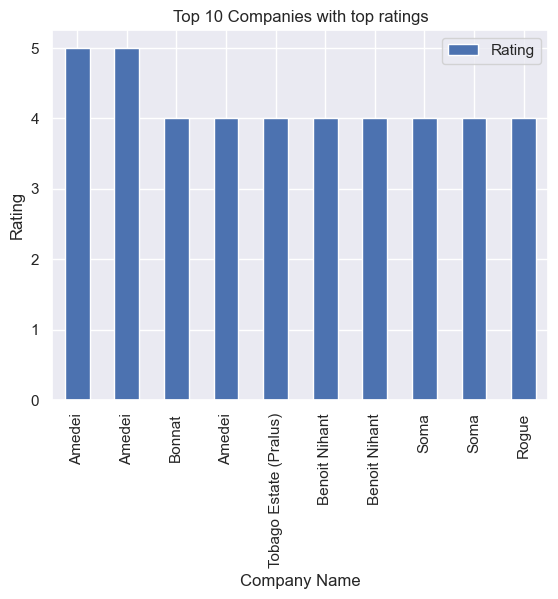

In [44]:
#Plotting

data_sorted_by_rating.plot(x='Company_name', y='Rating', kind='bar') 
plt.title("Top 10 Companies with top ratings")
plt.xlabel("Company Name")
plt.ylabel("Rating")
plt.savefig('bar top 10 cos with top ratings.png')
plt.show()